<a href="https://colab.research.google.com/github/TylerSzymkowicz/TylerSzymkowicz/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install kmodes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 9:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

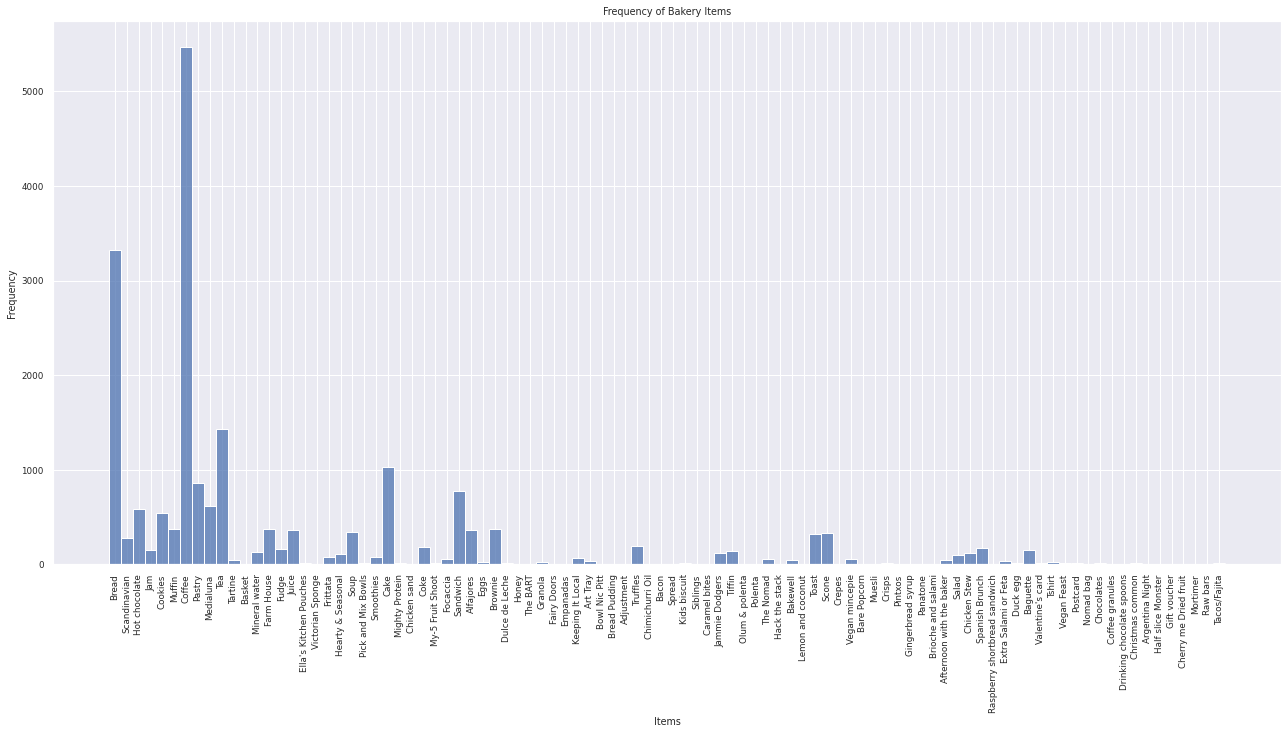

In [10]:
sns.histplot(df.Items)
sns.set(rc = {'figure.figsize':(22,10)}, font_scale = 0.8)
plt.xticks(list(range(0, len(pd.unique(df.Items))), ), rotation=90, ha = "center")
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()

# **Market Basket Analysis for Bakery Items**

In [11]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [12]:
# dfti.TransactionNo.groupby(dfti.Items)

In [13]:
#dfti=pd.get_dummies(dfti,drop_first=True)
# dfti.head()

In [14]:

items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [15]:
all_items=[i for item in items for i in item]
#all_items


In [16]:
from collections import Counter

In [17]:
item_frequencies=Counter(all_items)
#item_frequencies

In [18]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [19]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


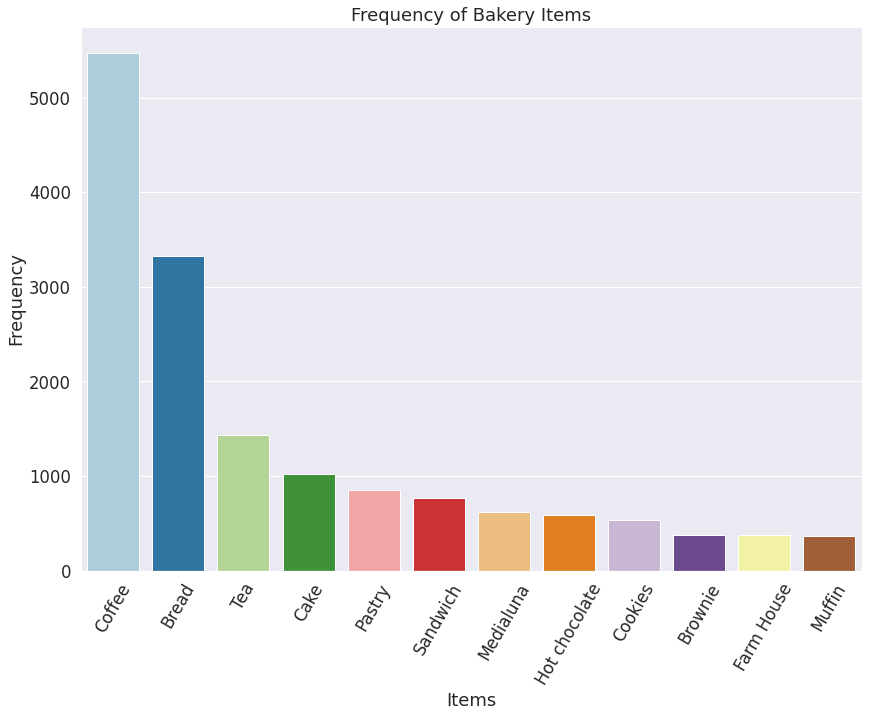

In [23]:
sns.barplot(item[0:12],itemfreqs[0:12])
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.show()

# **Association Rule**

In [24]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [25]:
item_series.columns=["transactions"]

In [26]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

# currious why we make a copy of the df_dummy dateframe here?

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [28]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

In [29]:
labels = frequent_itemsets.itemsets[0:11]
labels

6            (Coffee)
2             (Bread)
26              (Tea)
4              (Cake)
34    (Coffee, Bread)
19           (Pastry)
21         (Sandwich)
16        (Medialuna)
12    (Hot chocolate)
42     (Coffee, Cake)
8           (Cookies)
Name: itemsets, dtype: object

In [36]:
formattedLabels = []
for i in labels:
  i = str(i)
  # print(i[12:-3])
  formattedLabels.append(i[12:-3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


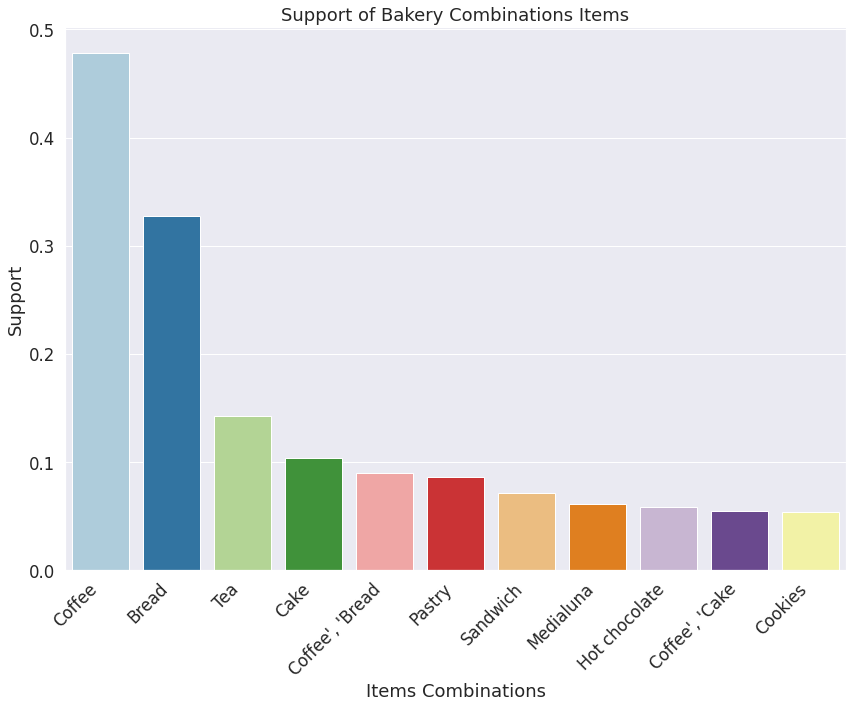

In [37]:
sns.barplot(formattedLabels,frequent_itemsets.support[0:11])
plt.title("Support of Bakery Combinations Items")
plt.xlabel("Items Combinations")
plt.ylabel("Support")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 11), ), formattedLabels, rotation=45, ha = "right")
plt.show()

In [38]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
30,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
31,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
33,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
32,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [41]:
# muDf = df.drop_duplicates()
df_dummy2 = df_dummy
df_dummy2['DayType']= df_drop.DayType
df_dummy2['Daypart']= df_drop.Daypart

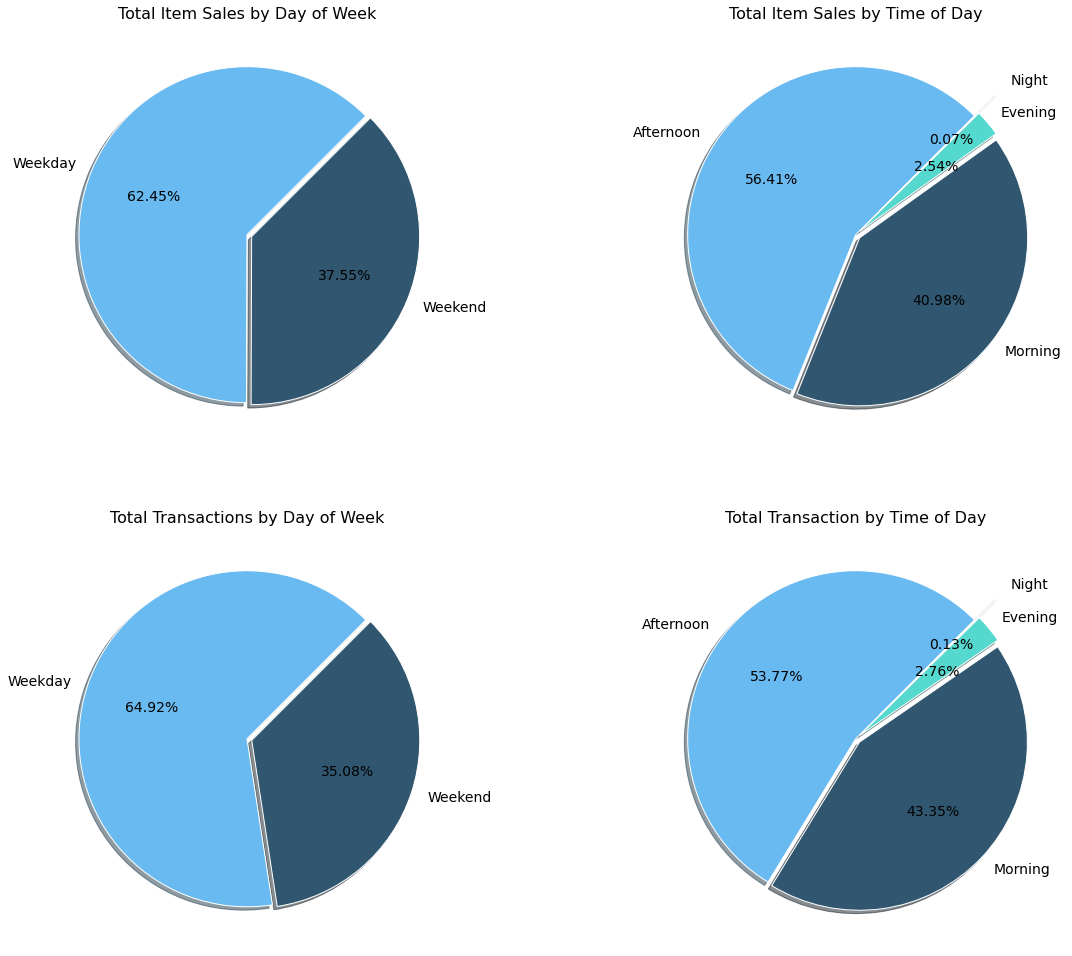

In [263]:
colorrr = ["#69BAF0", "#315770"]
colorrr2 = ["#69BAF0", "#315770","#55D9CE", "#ffffff"]
fig = plt.figure(figsize = (20, 17))
plt.subplot(2, 2, 1)
plt.pie(df.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Item Sales by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 2)


plt.pie(df.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Item Sales by Time of Day',color='black',fontsize= 16)


plt.subplot(2, 2, 3)
plt.pie(df_dummy2.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Transactions by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 4)


plt.pie(df_dummy2.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Transaction by Time of Day',color='black',fontsize= 16)

plt.show()


Text(0.5, 1.0, 'Total Item Sales by Time of Day')

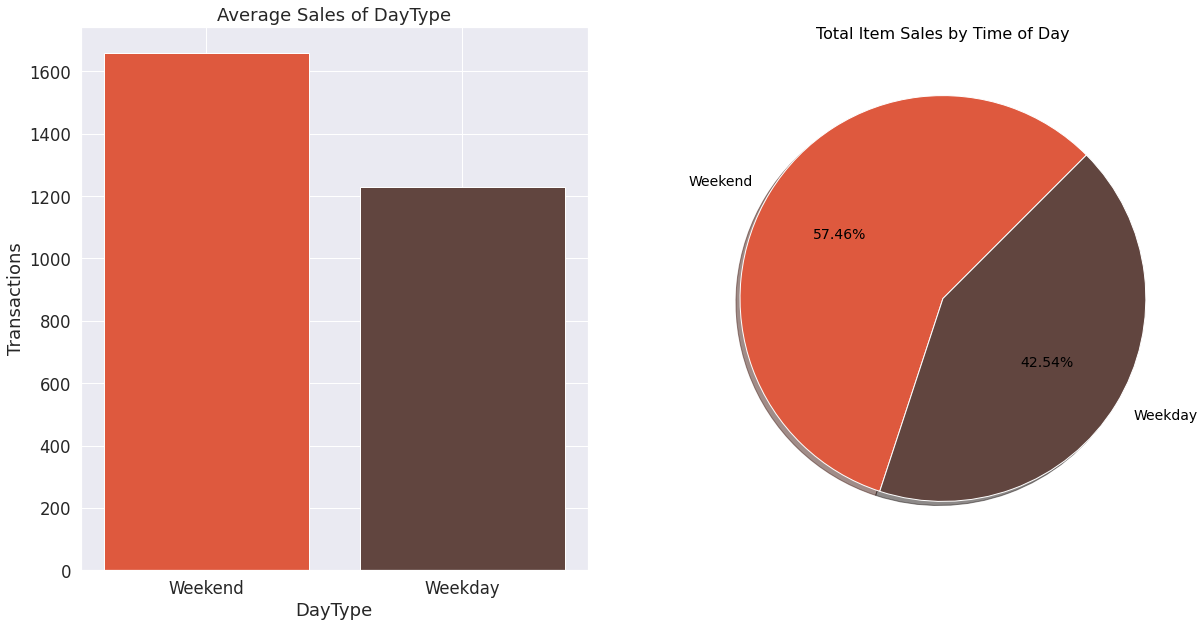

In [262]:
# dayAvgColor = ["#DE593E", "#756554"]
#61453F
dayAvgColor = ["#DE593E", "#61453F"]
fig = plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)

dayAvg = np.array(len(df_dummy2.loc[df_dummy2["DayType"]=="Weekend"])/2), (len(df_dummy2.loc[df_dummy2["DayType"]=="Weekday"])/5)
dayType = []
for i in df.DayType.unique():
  dayType.append(i)

plt.bar(dayType, dayAvg, color=dayAvgColor)
plt.xlabel("DayType")
plt.ylabel("Transactions")
plt.title("Average Sales of DayType")


plt.subplot(1, 2, 2)

plt.pie(dayAvg,
        labels = ["Weekend", "Weekday"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = dayAvgColor,
        shadow = True,
        # explode = [0,.0]
        )
plt.plot()
plt.title('Total Item Sales by Time of Day',color='black',fontsize= 16)

In [81]:
# df.Items.value_counts().sum()

In [82]:
# print('Coffee Proportion =', 5471/20507)
# print('Bread Proportion =', 3325/20507)
# print('Tea Proportion =', 1435/20507)
# print('Cake Proportion =', 1025/20507)
# print('Pastry Proportion =', 856/20507)
# print('Sandwich Proportion =', 771/20507)

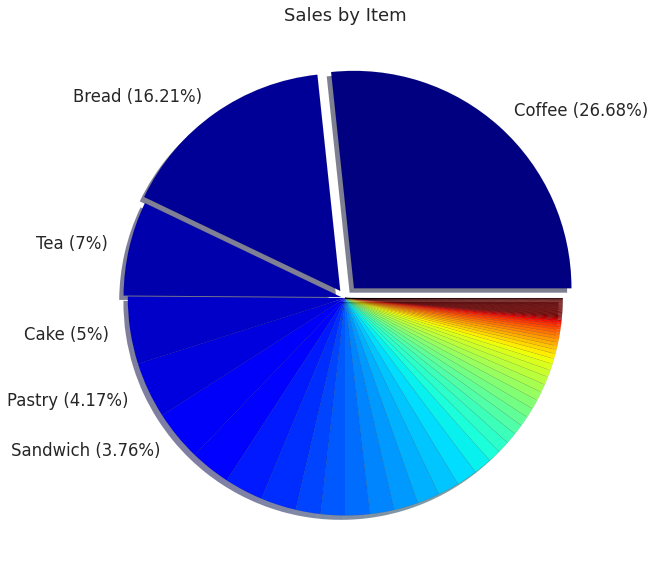

In [122]:



fig, ax = plt.subplots(figsize=(10, 10))

# fig, ax = plt.figure(figsize = (10, 10))
plt.title('Sales by Item')




theme = plt.get_cmap('jet')
ax.set_prop_cycle("color", [theme(2 * i / len(x))
                             for i in range(len(x))])


x = df.Items.value_counts()

# y = np.array([26.68, 16.21, 7, 5, 4.17, 3.76])
mylabels = ["Coffee (26.68%)", "Bread (16.21%)", "Tea (7%)", "Cake (5%)", "Pastry (4.17%)", "Sandwich (3.76%)",'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
myexplode = [0.06, 0.04, 0.02, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(x, 
        labels = mylabels, 
        explode = myexplode, 
        shadow = True,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.05,
                      'antialiased': True})

plt.show()

I disagree with the with first EDA insight. If you look at the if you look at the average sales Weekends are more profitable. Weekdays only apear more profitable becasue there are 5 days worth of sales. On avaegea weekends have 20% more sales then weekdays. You can say that more then 60% of all sales occur on weekdays, but that is not a accurate representation of the useful information.

# EDA Insights: 

- 0. Weekdays are more profitable, with 60% of sales occurring on weekday days. 
- 1. Fewer that 1% of sales occur during the hours designated as night and only 2.5% during the hours designated as evening:
  - As inconvenient as it might be for the patrons (especially dedicated/ loyal night-time customers), NOT OPERATING DURING THESE HOURS would likely increase profits by decreasing the operational costs (employee salary/ wages, utilities, insurance premiums for operating a cash business during periods more prone to (potentially violent) robbery/ theft, *etc.*) to a degree that more than offsets and loss in sales revenue.
- 2. Folks love coffee, bread, tea, pastries, cakes, & sammiches:
  - INCREASING STOCK & VARIETY of such items might increase sales revenue; 
  - as might CREATING PROMOTIONAL OFFERS tailored to the sale of these items; this insight should dovetail w/ those from the Market-Basket Analysis.

In [129]:
df.Items = df.Items.replace({'Bread': 0, 'Scandinavian': 1, 'Hot chocolate': 2, 'Jam': 3, 'Cookies': 4,
       'Muffin': 5, 'Coffee': 6, 'Pastry': 7, 'Medialuna': 8, 'Tea': 9, 'Tartine': 10,
       'Basket': 11, 'Mineral water': 12, 'Farm House': 13, 'Fudge': 14, 'Juice': 15,
       "Ella's Kitchen Pouches": 16, 'Victorian Sponge': 17, 'Frittata': 18,
       'Hearty & Seasonal': 19, 'Soup': 20, 'Pick and Mix Bowls': 21, 'Smoothies': 22,
       'Cake': 23, 'Mighty Protein': 24, 'Chicken sand': 25, 'Coke': 26,
       'My-5 Fruit Shoot': 27, 'Focaccia': 28, 'Sandwich': 29, 'Alfajores': 30, 'Eggs': 31,
       'Brownie': 32, 'Dulce de Leche': 33, 'Honey': 34, 'The BART': 35, 'Granola': 36,
       'Fairy Doors': 37, 'Empanadas': 38, 'Keeping It Local': 39, 'Art Tray': 40,
       'Bowl Nic Pitt': 41, 'Bread Pudding': 42, 'Adjustment': 43, 'Truffles': 44,
       'Chimichurri Oil': 45, 'Bacon': 46, 'Spread': 47, 'Kids biscuit': 48, 'Siblings': 49,
       'Caramel bites': 50, 'Jammie Dodgers': 51, 'Tiffin': 52, 'Olum & polenta': 53,
       'Polenta': 54, 'The Nomad': 55, 'Hack the stack': 56, 'Bakewell': 57,
       'Lemon and coconut': 58, 'Toast': 59, 'Scone': 60, 'Crepes': 61, 'Vegan mincepie': 62,
       'Bare Popcorn': 63, 'Muesli': 64, 'Crisps': 65, 'Pintxos': 66, 'Gingerbread syrup': 67,
       'Panatone': 68, 'Brioche and salami': 69, 'Afternoon with the baker': 70,
       'Salad': 71, 'Chicken Stew': 72, 'Spanish Brunch': 73,
       'Raspberry shortbread sandwich': 74, 'Extra Salami or Feta': 75,
       'Duck egg': 76, 'Baguette': 77, "Valentine's card": 78, 'Tshirt': 79,
       'Vegan Feast': 80, 'Postcard': 81, 'Nomad bag': 82, 'Chocolates': 83,
       'Coffee granules': 84, 'Drinking chocolate spoons': 85, 'Christmas common': 86,
       'Argentina Night': 87, 'Half slice Monster': 88, 'Gift voucher': 89,
       'Cherry me Dried fruit': 90, 'Mortimer': 91, 'Raw bars': 92, 'Tacos/Fajita': 93})

In [130]:
df.Items.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

In [131]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,Morning,Weekend
1,2,1,2016-10-30 10:05:34,Morning,Weekend
2,2,1,2016-10-30 10:05:34,Morning,Weekend
3,3,2,2016-10-30 10:07:57,Morning,Weekend
4,3,3,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,9,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,6,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,7,2017-09-04 14:57:06,Afternoon,Weekend


In [132]:
df.Daypart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [133]:
df.Daypart = df['Daypart'].replace({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [134]:
df.Daypart.unique()

array([0, 1, 2, 3])

In [135]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,0,Weekend
1,2,1,2016-10-30 10:05:34,0,Weekend
2,2,1,2016-10-30 10:05:34,0,Weekend
3,3,2,2016-10-30 10:07:57,0,Weekend
4,3,3,2016-10-30 10:07:57,0,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,Weekend
20503,9682,9,2017-09-04 14:32:58,1,Weekend
20504,9683,6,2017-09-04 14:57:06,1,Weekend
20505,9683,7,2017-09-04 14:57:06,1,Weekend


In [136]:
df.DayType.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [137]:
df.DayType = df.DayType.replace({'Weekend': 0, 'Weekday': 1})

In [138]:
df.DayType.unique()

array([0, 1])

In [139]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,0,0
1,2,1,2016-10-30 10:05:34,0,0
2,2,1,2016-10-30 10:05:34,0,0
3,3,2,2016-10-30 10:07:57,0,0
4,3,3,2016-10-30 10:07:57,0,0
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,0
20503,9682,9,2017-09-04 14:32:58,1,0
20504,9683,6,2017-09-04 14:57:06,1,0
20505,9683,7,2017-09-04 14:57:06,1,0


In [140]:
df.DateTime.unique()

array(['2016-10-30 9:58:11', '2016-10-30 10:05:34', '2016-10-30 10:07:57',
       ..., '2017-09-04 14:32:58', '2017-09-04 14:57:06',
       '2017-09-04 15:04:24'], dtype=object)

In [141]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'] = df['DateTime'].dt.strftime('%Y')

# df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m')

In [142]:
df.DateTime.unique()

array(['2016', '2017'], dtype=object)

In [143]:
df.DateTime = pd.to_numeric(df.DateTime)

In [144]:
df.rename(columns = {'DateTime': 'Year', 'Daypart': 'Morning:0, Afternoon:1, Evening:2, Night:3', 'DayType': 'Weekend:0, Weekday:1'}, inplace = True)

In [145]:
df

,TransactionNo,Items,Year,"Morning:0, Afternoon:1, Evening:2, Night:3","Weekend:0, Weekday:1"
0,1,0,2016,0,0
1,2,1,2016,0,0
2,2,1,2016,0,0
3,3,2,2016,0,0
4,3,3,2016,0,0
...,...,...,...,...,...
20502,9682,6,2017,1,0
20503,9682,9,2017,1,0
20504,9683,6,2017,1,0
20505,9683,7,2017,1,0


## **KMode Cluster**

In [146]:
df=pd.read_csv('Bakery.csv')

In [147]:
new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

,TransactionNo,Daypart,DayType
0,1,Morning,Weekend
1,2,Morning,Weekend
2,2,Morning,Weekend
3,3,Morning,Weekend
4,3,Morning,Weekend
...,...,...,...
20502,9682,Afternoon,Weekend
20503,9682,Afternoon,Weekend
20504,9683,Afternoon,Weekend
20505,9683,Afternoon,Weekend


In [148]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
2,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
4,3,Morning,Weekend,Morning Weekend


In [173]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [174]:
df_drop = new_df.drop_duplicates()
df_drop

,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
6,4,Morning,Weekend,Morning Weekend
7,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
20495,9680,Afternoon,Weekend,Afternoon Weekend
20496,9681,Afternoon,Weekend,Afternoon Weekend
20500,9682,Afternoon,Weekend,Afternoon Weekend
20504,9683,Afternoon,Weekend,Afternoon Weekend


In [175]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)
# df_drop


,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
6,4,Morning,Weekend,Morning Weekend
7,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
20495,9680,Afternoon,Weekend,Afternoon Weekend
20496,9681,Afternoon,Weekend,Afternoon Weekend
20500,9682,Afternoon,Weekend,Afternoon Weekend
20504,9683,Afternoon,Weekend,Afternoon Weekend


In [176]:
df_drop = df_drop.reset_index(drop=True)
df_drop

,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
2,3,Morning,Weekend,Morning Weekend
3,4,Morning,Weekend,Morning Weekend
4,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
9460,9680,Afternoon,Weekend,Afternoon Weekend
9461,9681,Afternoon,Weekend,Afternoon Weekend
9462,9682,Afternoon,Weekend,Afternoon Weekend
9463,9683,Afternoon,Weekend,Afternoon Weekend


**Completed dataframe encoding**

In [153]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head()
#Dataframe for dummy variables and Daytype/DayType

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend


**Compute Number of Clusters for Model using Elbow Curve**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 25027.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 471, cost: 23991.0
Run 1, iteration: 2/100, moves: 312, cost: 23991.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2275, cost: 20620.0
Init: initializing 

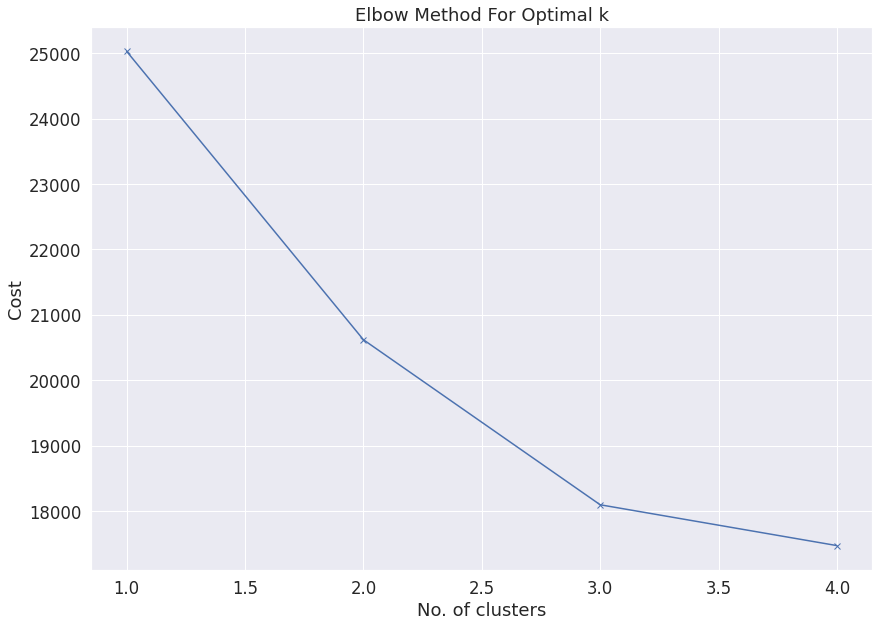

In [154]:
# Elbow curve to find optimal K
data = df_dummy
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**Compute Kmodes Model**

In [155]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3261, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 356, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2718, cost: 20620.0
Run 3, iteration: 2/100, moves: 262, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 485, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2102, cost: 20620.0
Best run was number 1


array([0, 0, 0, ..., 1, 1, 0], dtype=uint16)

**Add clusters to dataframe**

In [156]:
kmode.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(kmode.labels_)  # converting numpy array into pandas series object 
data['clust'] = mb # creating a  new column and assigning it to new column 

In [157]:
data.groupby(data.clust).apply(pd.DataFrame.mode).reset_index(drop=True)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType,clust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Afternoon Weekday,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Morning Weekday,1


In [158]:
data.groupby(data.clust).mean()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
clust,,,,,,,,,,,,,,,,,,,,,
0,0.000155,0.006502,0.035294,0.001084,0.004180,0.000000,0.020433,0.004644,0.000774,0.000310,...,0.000155,0.004489,0.014551,0.023220,0.023684,0.003096,0.002012,0.002167,0.005108,0.001084
1,0.000000,0.000333,0.038602,0.000000,0.003661,0.000333,0.006656,0.005990,0.000000,0.001331,...,0.000000,0.009651,0.017304,0.055907,0.012978,0.000333,0.000000,0.000666,0.006323,0.000000


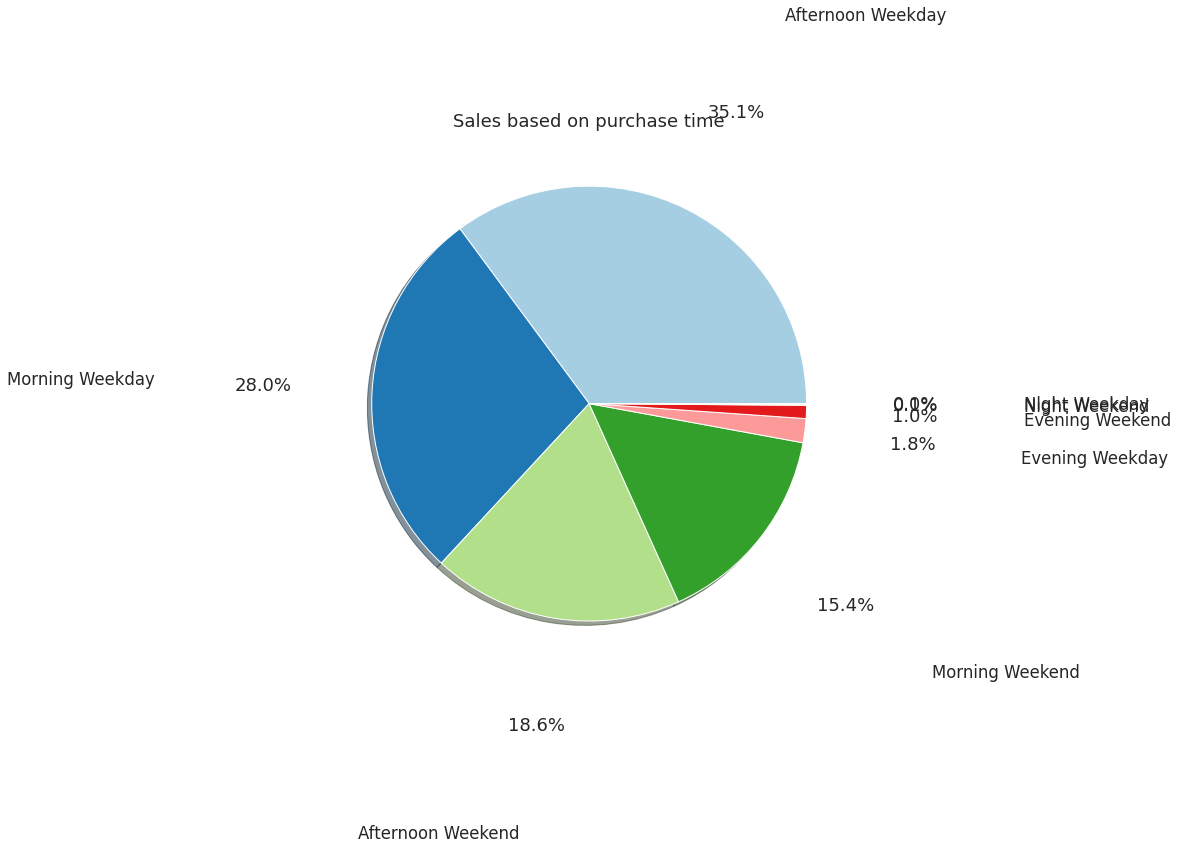

In [261]:
fig = plt.figure(figsize = (10, 10))

label = ['Afternoon Weekday', 'Morning Weekday', 'Afternoon Weekend', 'Morning Weekend', 'Evening Weekday','Evening Weekend','Night Weekend','Night Weekday ']

plt.pie(df_dummy["PartType"].value_counts(),
        shadow = True,
        autopct='%1.1f%%',
        pctdistance=1.5,
        labels = label,
        labeldistance=2,
        explode = [0,0,0,0,0,0,0,0])
plt.title('Sales based on purchase time')
plt.show()

In [216]:
# df_dummy["PartType"].value_counts()

In [215]:
# df_dummy.head()
# df_dummy.Coffee

In [217]:
df_dummy2 = df_dummy
df_dummy2['DayType']= df_drop.DayType
df_dummy2['Daypart']= df_drop.Daypart
# df_dummy2.head()

In [214]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 8.27)
# plt.xticks(rotation=45, ha="right")
# ax = sns.barplot(x="PartType", y="Coffee", hue="PartType", data=df_dummy)

In [213]:
# brpDf = df
# brpDf = df.drop_duplicates()
# brpDf.drop(columns = "DateTime", inplace = True)
# one_hot = pd.get_dummies(brpDf['Items'])
# brpDf = brpDf.drop('Items',axis = 1)
# brpDf = brpDf.join(one_hot)
# brpDf

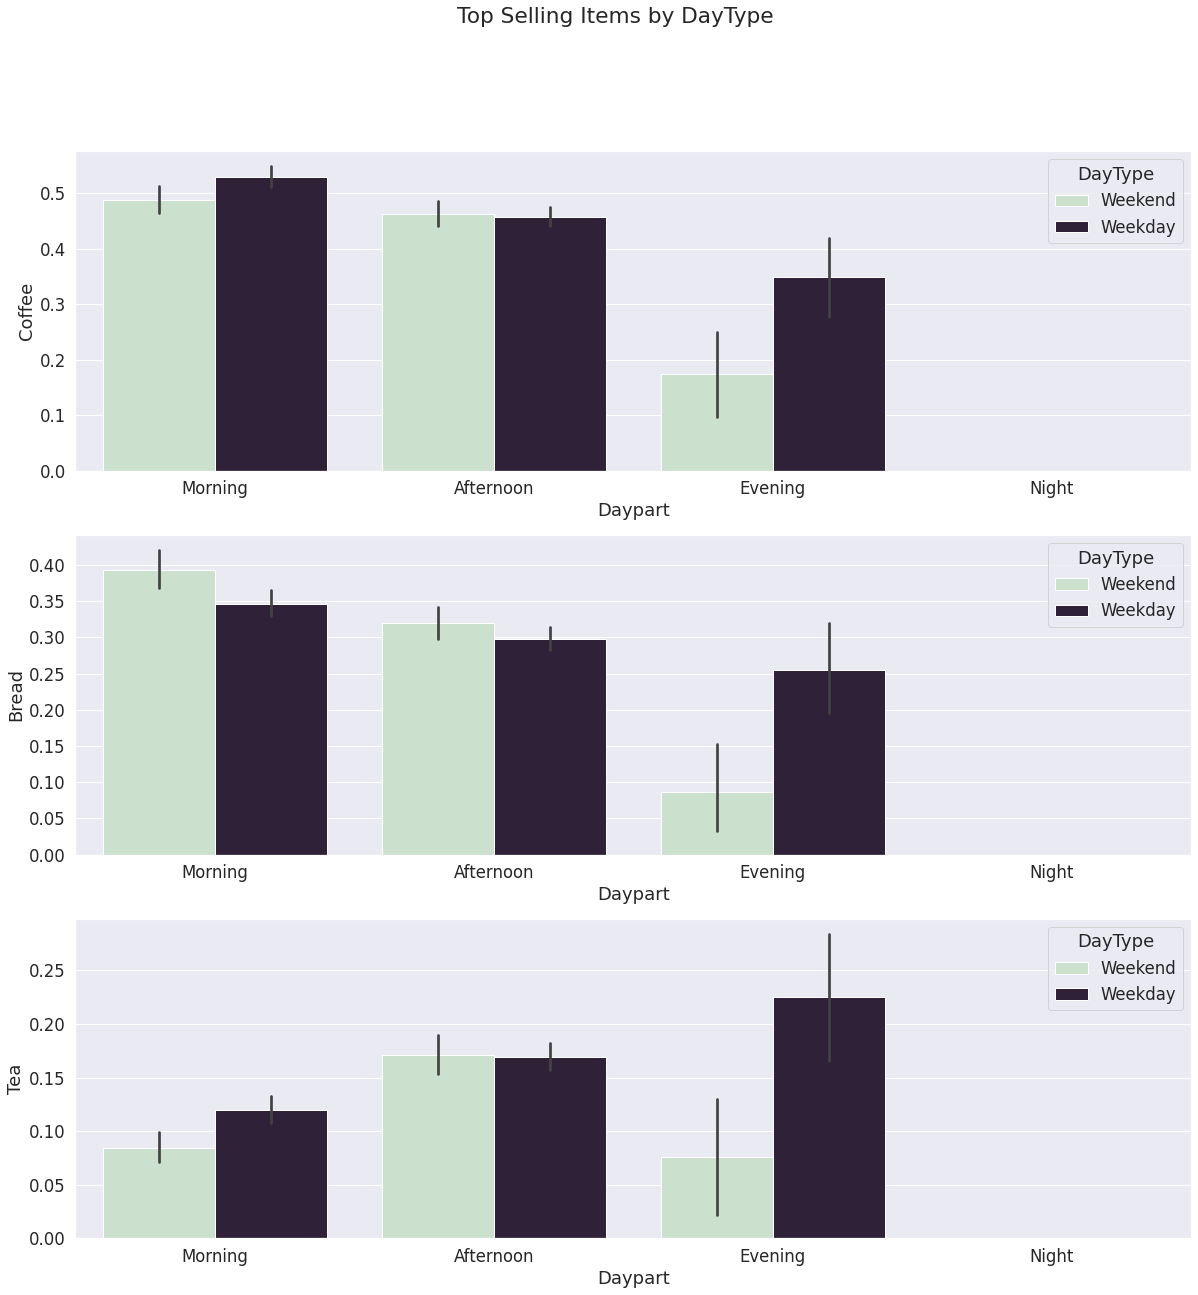

In [233]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

fig.suptitle('Top Selling Items by DayType')

sns.barplot(ax=axes[0], x="Daypart", y="Coffee", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")
sns.barplot(ax=axes[1], x="Daypart", y="Bread", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")
sns.barplot(ax=axes[2], x="Daypart", y="Tea", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")

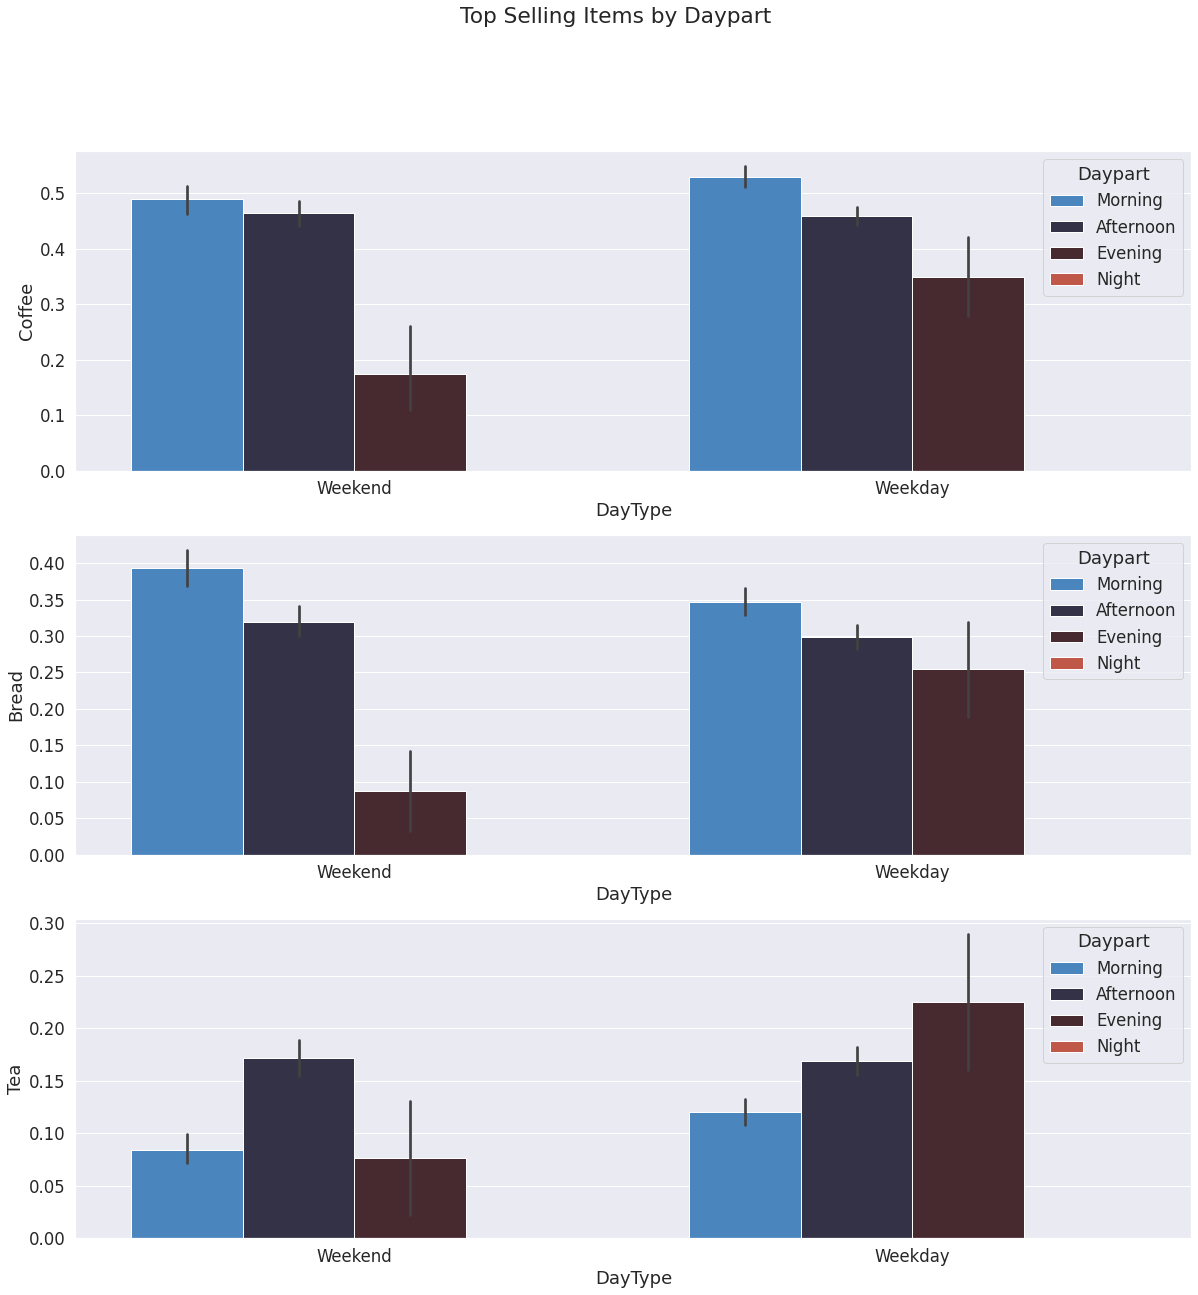

In [232]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

fig.suptitle('Top Selling Items by Daypart')

sns.barplot(ax=axes[0],x="DayType", y="Coffee", hue="Daypart", data=df_dummy2,  palette="icefire")
sns.barplot(ax=axes[1],x="DayType", y="Bread", hue="Daypart", data=df_dummy2,  palette="icefire")
sns.barplot(ax=axes[2],x="DayType", y="Tea", hue="Daypart", data=df_dummy2, palette="icefire")